In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [33]:
file=open('raw_data.pickle','rb')

In [35]:
split_data=pickle.load(file)

In [43]:
X_train,X_test,y_train,y_test=split_data

In [44]:
svr_regressor=SVR()

SUPPORT_VECTOR_REGRESSION

In [45]:
svr_params={'C':np.logspace(-3,4,10),'epsilon':np.logspace(-4,3,10)}
grid_search=GridSearchCV(estimator=svr_regressor,
                        param_grid=svr_params,cv=7,n_jobs=-1,
                        scoring='r2')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04]),
                         'epsilon': array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [46]:
grid_search.best_params_

{'C': 46.41588833612782, 'epsilon': 0.021544346900318846}

In [47]:
svr_y_pred=grid_search.predict(X_test)

In [48]:
print(r2_score(y_test,svr_y_pred))
print(mean_absolute_error(y_test,svr_y_pred))
print(mean_squared_error(y_test,svr_y_pred))
print(np.sqrt(mean_squared_error(y_test,svr_y_pred)))

0.889907851812589
0.43621141807289554
0.7870126386519759
0.8871373279554727


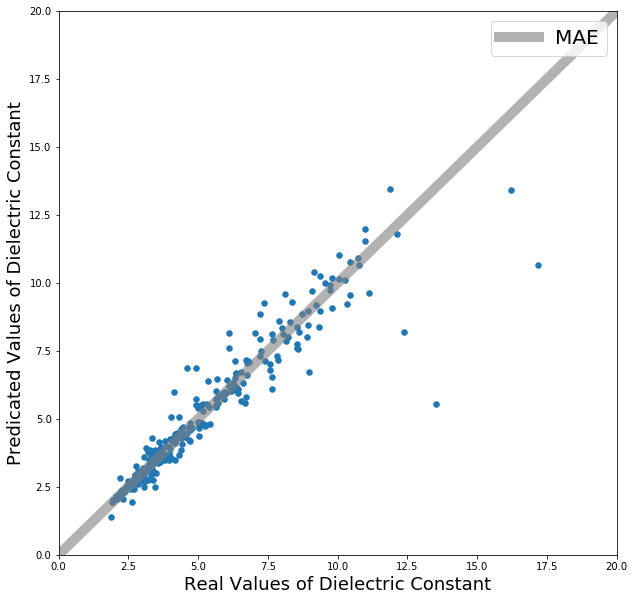

In [92]:
plt.figure(figsize=(10,10))
plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel('Real Values of Dielectric Constant',fontsize=18)
plt.ylabel('Predicated Values of Dielectric Constant',fontsize=18)
plt.plot(np.linspace(0,20,21),c='grey',lw=10,alpha=0.6,label='MAE')
plt.scatter(x=y_test,y=svr_y_pred,s=30,alpha=1)
plt.legend(loc='upper right',prop={'size': 20})
plt.show()

In [50]:
params=grid_search.best_params_
svr_regressor=SVR(**params)

In [51]:
svr_regressor.fit(X_train,y_train)

SVR(C=46.41588833612782, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.021544346900318846, gamma='scale', kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
svr_y_train_pred=svr_regressor.predict(X_train)

In [53]:
Results=pd.DataFrame(columns=['Training Score','Testing Score'],index=['$r^2$','MAE','MSE','RMSE'])

In [54]:
Results['Training Score']=[r2_score(y_train,svr_y_train_pred),
                           mean_absolute_error(y_train,svr_y_train_pred),
                           mean_squared_error(y_train,svr_y_train_pred),
                           np.sqrt(mean_squared_error(y_train,svr_y_train_pred))]

Results['Testing Score']=[r2_score(y_test,svr_y_pred),
                         mean_absolute_error(y_test,svr_y_pred),
                         mean_squared_error(y_test,svr_y_pred),
                         np.sqrt(mean_squared_error(y_test,svr_y_pred))]

In [55]:
np.round(Results,2)

,Training Score,Testing Score
$r^2$,0.98,0.89
MAE,0.07,0.44
MSE,0.14,0.79
RMSE,0.38,0.89


SHAP ANALYSIS

In [56]:
import shap

In [61]:
X_new_train=np.array(X_train.mean()).reshape(1,93)

In [62]:
shap_explain=shap.KernelExplainer(model=svr_regressor.predict,data=X_new_train)

In [63]:
import warnings
warnings.filterwarnings(action='ignore')

In [64]:
shap_values=shap_explain.shap_values(X_train)

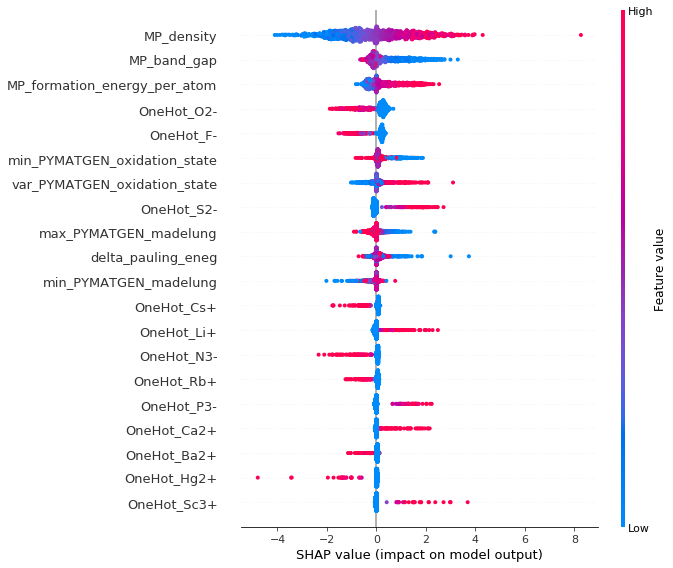

In [65]:
shap.summary_plot(shap_values,X_train)

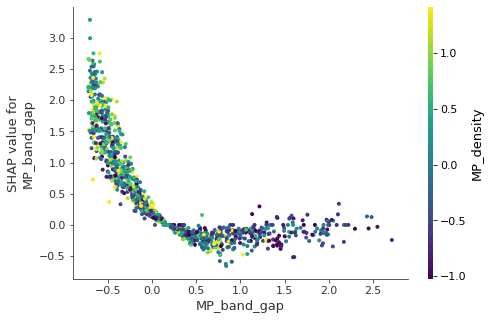

In [66]:
shap.dependence_plot(ind='MP_band_gap',shap_values=shap_values,features=X_train,interaction_index='MP_density',cmap='viridis')

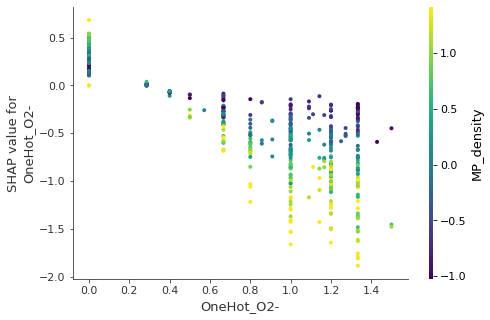

In [67]:
shap.dependence_plot(ind='OneHot_O2-',shap_values=shap_values,features=X_train,interaction_index='MP_density',cmap='viridis')

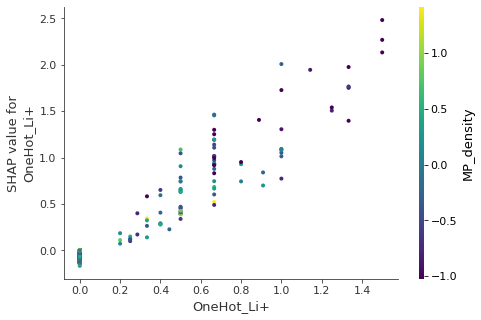

In [68]:
shap.dependence_plot(ind='OneHot_Li+',shap_values=shap_values,features=X_train,interaction_index='MP_density',cmap='viridis')

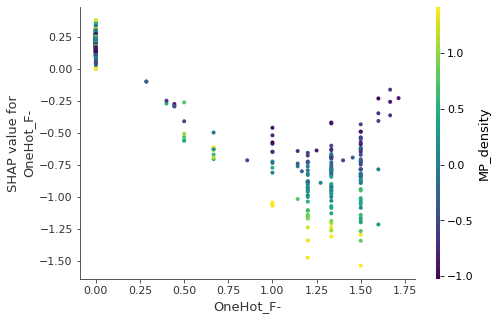

In [69]:
shap.dependence_plot(ind='OneHot_F-',shap_values=shap_values,features=X_train,interaction_index='MP_density',cmap='viridis')